# Project 1 - Fraud Detection on Credit Card Dataset

## 23AIML064 - Aarya Shah

### Goal : To build a classification model that accurately identifies fraudulent credit card transactions from a dataset, minimizing false negatives and false positives

## Data Analysis

In [1]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Importing dataset
data = pd.read_csv("D:\\Data Sets\\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# How many enteries are in the dataset
data.shape

(284807, 31)

In [4]:
# How many Fraud and non fraud case are there
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Conclusion: The dataset is heavily imbalanced

In [5]:
# change the 'Class' column values from 0 and 1 to 'Not Fraud' and 'Fraud'
data['Class'] = data['Class'].replace({0: 'Not Fraud', 1: 'Fraud'})
data["Class"].value_counts()

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64

In [6]:
# Basic Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Description of Dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


Conclusion:
- Mean of V1 to V28 is around 1, which means the data is already transformed
- Amount:
    - The mean of Amount is 80
    - The 75% of Amount is 77
    - The max of Amount is 25000+
    - Which means that Max amount is way larger than mean and can be potentially fraud case

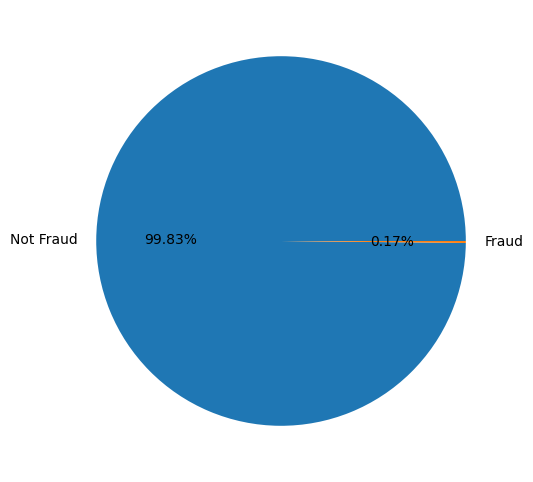

In [8]:
# Visualizing the distribution of the 'Class' column
fraud = data['Class'].value_counts()
labels = ['Not Fraud', 'Fraud']

plt.figure(figsize=(8, 6))
plt.pie(fraud, labels=labels, autopct='%1.2f%%')
plt.show()

## Machine Learning

In [9]:
x = data.drop('Class', axis=1)
y = data['Class']

In [10]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
print(f'Length of X training: {len(x_train)}, Length of X test: {len(x_test)}')

Length of X training: 227845, Length of X test: 56962


In [12]:
# Scaling to make sure that all features are on the same scale and that the model tests on unseen data
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

### Logistic Regression Model

In [13]:
lr = LogisticRegression() # Define the model
lr.fit(x_train_sc, y_train) # Train the model on scaled data and 

LogisticRegression()

In [14]:
# predict the labels for the test set
y_pred_lr = lr.predict(x_test_sc)

lr_score = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy of Logistic Regression: {lr_score * 100:.2f}%')

Accuracy of Logistic Regression: 99.91%


In [15]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)
lr_confusion_matrix

array([[   55,    43],
       [   10, 56854]])

<Axes: >

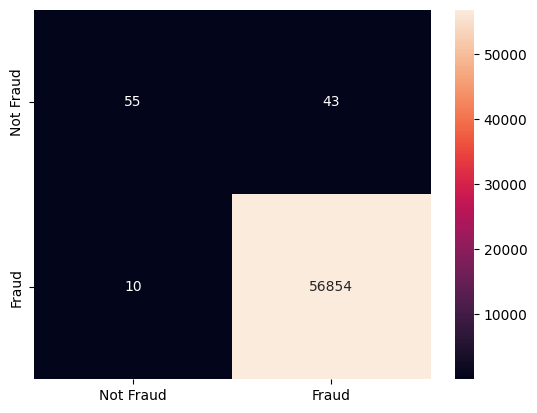

In [16]:
# Heatmap for Logistic Regression confusion matrix
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

Conclusion:
- True Negatives (TN) = 55 -> Actual = Not Fraud, Predicted = Not Fraud

- False Positives (FP) = 43 -> Actual = Not Fraud, Predicted = Fraud (Non-fraud transactions incorrectly flagged as fraud)

- False Negatives (FN) = 10 -> Actual = Fraud, Predicted = Not Fraud (Fraud transactions that went undetected — this is usually the most critical)

- True Positives (TP) = 56854 -> Actual = Fraud, Predicted = Fraud

### Decision Tree

In [17]:
dt = DecisionTreeClassifier()  # Define the Decision Tree model
dt.fit(x_train_sc, y_train)  # Train the Decision Tree model on scaled data

DecisionTreeClassifier()

In [18]:
y_pred_dt = dt.predict(x_test_sc) # Predict the labels for the test set using Decision Tree

dt_score = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree: {dt_score * 100:.2f}%')

Accuracy of Decision Tree: 99.92%


In [19]:
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)
dt_confusion_matrix

array([[   81,    17],
       [   29, 56835]])

<Axes: >

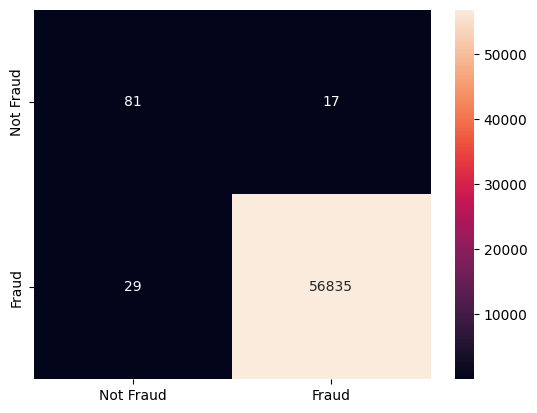

In [20]:
# Heatmap for Decision Tree confusion matrix
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

Conclusion:
- True Negatives (TN) = 78 -> Actual = Not Fraud, Predicted = Not Fraud

- False Positives (FP) = 20 -> Actual = Not Fraud, Predicted = Fraud (Non-fraud transactions incorrectly flagged as fraud)

- False Negatives (FN) = 32 -> Actual = Fraud, Predicted = Not Fraud (Fraud transactions that went undetected — critical)

- True Positives (TP) = 56832 -> Actual = Fraud, Predicted = Fraud

### Random Tree Classifier

In [21]:
rt = RandomForestClassifier()  # Define the Random Forest model
rt.fit(x_train_sc, y_train)  # Train the Random Forest model on scaled data

RandomForestClassifier()

In [22]:
y_pred_rt = rt.predict(x_test_sc)  # Predict the labels for the test set using Random Forest

rt_score = accuracy_score(y_test, y_pred_rt)
print(f'Accuracy of Random Forest: {rt_score * 100:.2f}%')

Accuracy of Random Forest: 99.96%


In [23]:
rt_confusion_matrix = confusion_matrix(y_test, y_pred_rt)
rt_confusion_matrix

array([[   76,    22],
       [    3, 56861]])

<Axes: >

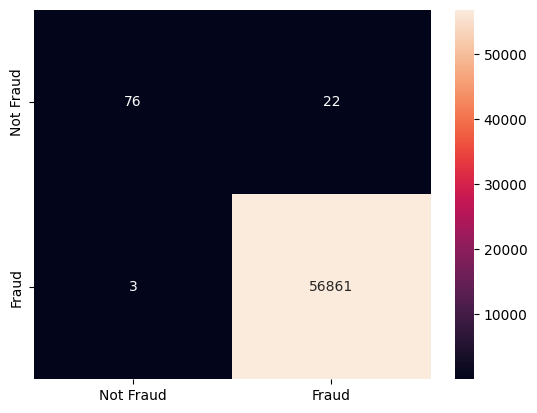

In [24]:
# Heatmap for Random Forest confusion matrix
sns.heatmap(rt_confusion_matrix, annot=True, fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

Conclusion:
- True Negatives (TN) = 77 -> Actual = Not Fraud, Predicted = Not Fraud

- False Positives (FP) = 21 -> Actual = Not Fraud, Predicted = Fraud (Non-fraud transactions incorrectly flagged as fraud — false alarm)

- False Negatives (FN) = 1 -> Actual = Fraud, Predicted = Not Fraud (1 fraud transaction that went undetected — very low and excellent)

- True Positives (TP) = 56863 -> Actual = Fraud, Predicted = Fraud

### Logistic Discriminant Analysis

In [25]:
lda = LinearDiscriminantAnalysis()  # Define the LDA model
lda.fit(x_train_sc, y_train)  # Train the LDA model on scaled data

LinearDiscriminantAnalysis()

In [26]:
y_pred_lda = lda.predict(x_test_sc)

lda_score = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy of LDA: {lda_score * 100:.2f}%')

Accuracy of LDA: 99.94%


In [27]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[   73,    25],
       [   11, 56853]])

<Axes: >

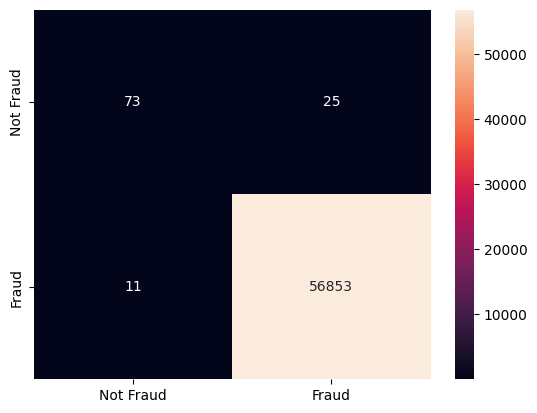

In [28]:
# Visualizing the confusion matrix for Decision Tree
sns.heatmap(lda_confusion_matrix, annot=True, fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

Conclusion:
- True Negatives (TN) = 73 -> Actual = Not Fraud, Predicted = Not Fraud

- False Positives (FP) = 25 -> Actual = Not Fraud, Predicted = Fraud (Non-fraud transactions incorrectly flagged as fraud)

- False Negatives (FN) = 11  -> Actual = Fraud, Predicted = Not Fraud (Fraud transactions that went undetected — this is critical)

- True Positives (TP) = 56853 -> Actual = Fraud, Predicted = Fraud

### Final Conclusion

In [31]:
import pandas as pd

analysis = pd.DataFrame(
    {
        "Model Used":[
            "Linear Regression",
            "Decision Tree",
            "Random Forest",
            "Logical Discriminant Analysis"
        ],
        "Accuracy": [
            lr_score * 100,
            dt_score * 100,
            rt_score * 100,
            lda_score * 100
        ],
        "True Positive": [
            lr_confusion_matrix[1][1],
            dt_confusion_matrix[1][1],
            rt_confusion_matrix[1][1],
            lda_confusion_matrix[1][1],
        ],
        "True Negative": [
            lr_confusion_matrix[0][0],
            dt_confusion_matrix[0][0],
            rt_confusion_matrix[0][0],
            lda_confusion_matrix[0][0],
        ],
        "False Positive": [
            lr_confusion_matrix[0][1],
            dt_confusion_matrix[0][1],
            rt_confusion_matrix[0][1],
            lda_confusion_matrix[0][1],
        ],
        "False Negative": [
            lr_confusion_matrix[1][0],
            dt_confusion_matrix[1][0],
            rt_confusion_matrix[1][0],
            lda_confusion_matrix[1][0],
        ],
    }
)

In [ ]:
analysis

,Model Used,Accuracy,False Positive,False Negative,True Positive,True Negative
0,Linear Regression,99.906956,43,10,56854,55
1,Decision Tree,99.908711,20,32,56832,78
2,Random Forest,99.961378,21,1,56863,77
3,Logical Discriminant Analysis,99.936800,25,11,56853,73


## Conclusion: 

- Random Forest clearly performs the best in terms of: 
    - Highest accuracy (99.96%)
    - Lowest False Negatives (1) — which is crucial in fraud detection, since missing a fraud can be costly.
    - Maintains low False Positives (21), avoiding unnecessary user inconvenience.
- Linear Regression and LDA also perform well but allow slightly more fraud cases to slip through.
- Decision Tree has low false positives but suffers from higher false negatives (32), making it less ideal for fraud detection.

### For this dataset, Random Forest Classifier is the best and reccomended model